In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from colorama import Fore, Style
from tabulate import tabulate

# Load the dataset
file_path = "/content/BreastCancer.csv"
data = pd.read_csv(file_path)

# Enhanced dataset overview
print(Fore.CYAN + Style.BRIGHT + "Dataset Overview:" + Style.RESET_ALL)
print(tabulate(data.describe(include='all').transpose(), headers="keys", tablefmt="fancy_grid", showindex=True))

# Remove any irrelevant or unnecessary columns
drop_columns = [col for col in data.columns if 'Unnamed' in col or data[col].nunique() == 1]
data.drop(columns=drop_columns, inplace=True)

# Check for missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print(Fore.MAGENTA + Style.BRIGHT + "\nMissing Values Detected:" + Style.RESET_ALL)
    print(tabulate(missing_values[missing_values > 0].reset_index(), headers=["Column", "Missing Values"], tablefmt="fancy_grid"))
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy="mean")
    data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
else:
    print(Fore.GREEN + "\nNo missing values detected." + Style.RESET_ALL)

# Target variable mapping and feature preprocessing
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})  # Binary mapping for target
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Visualizing target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.title("Diagnosis Distribution", fontsize=16, weight="bold")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=False, linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=16, weight="bold")
plt.show()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 3]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Display the best parameters
print(Fore.GREEN + Style.BRIGHT + "\nOptimized Hyperparameters:" + Style.RESET_ALL)
best_params = grid_search.best_params_
print(tabulate(best_params.items(), headers=["Hyperparameter", "Value"], tablefmt="fancy_grid"))

# Model training with the best estimator
best_model = grid_search.best_estimator_

# Save and load the model
model_filename = "optimized_breast_cancer_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)

print(Fore.BLUE + f"\nModel saved and loaded successfully as {model_filename}." + Style.RESET_ALL)

# Evaluation and metrics
y_pred = loaded_model.predict(X_test)
print(Fore.YELLOW + "\nClassification Report:" + Style.RESET_ALL)
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix", fontsize=16, weight="bold")
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Feature importances visualization
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(y=feature_importances.index, x=feature_importances.values, palette="mako", edgecolor="black")
plt.title("Feature Importances", fontsize=16, weight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(Fore.CYAN + f"\nFinal Model Accuracy: {accuracy:.2%}" + Style.RESET_ALL)


ModuleNotFoundError: No module named 'colorama'

Dataset Overview:
                         count unique  top freq             mean  \
id                       569.0    NaN  NaN  NaN  30371831.432337   
diagnosis                  569      2    B  357              NaN   
radius_mean              569.0    NaN  NaN  NaN        14.127292   
texture_mean             569.0    NaN  NaN  NaN        19.289649   
perimeter_mean           569.0    NaN  NaN  NaN        91.969033   
area_mean                569.0    NaN  NaN  NaN       654.889104   
smoothness_mean          569.0    NaN  NaN  NaN          0.09636   
compactness_mean         569.0    NaN  NaN  NaN         0.104341   
concavity_mean           569.0    NaN  NaN  NaN         0.088799   
concave points_mean      569.0    NaN  NaN  NaN         0.048919   
symmetry_mean            569.0    NaN  NaN  NaN         0.181162   
fractal_dimension_mean   569.0    NaN  NaN  NaN         0.062798   
radius_se                569.0    NaN  NaN  NaN         0.405172   
texture_se               569.0

<ipython-input-3-441ca6f870e2>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


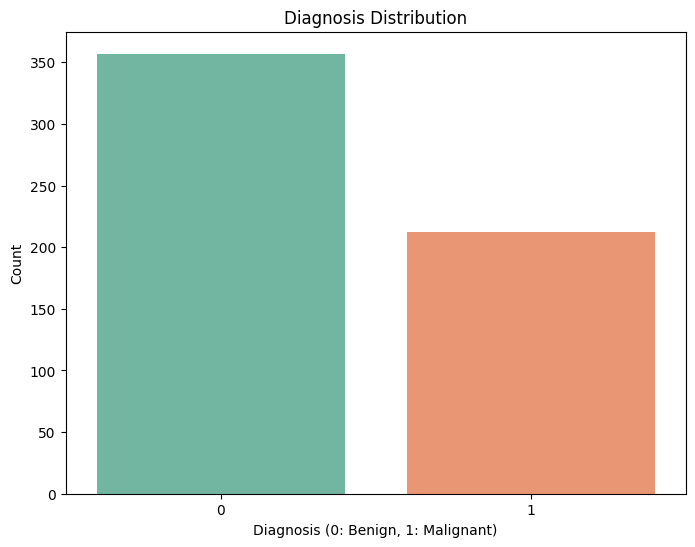

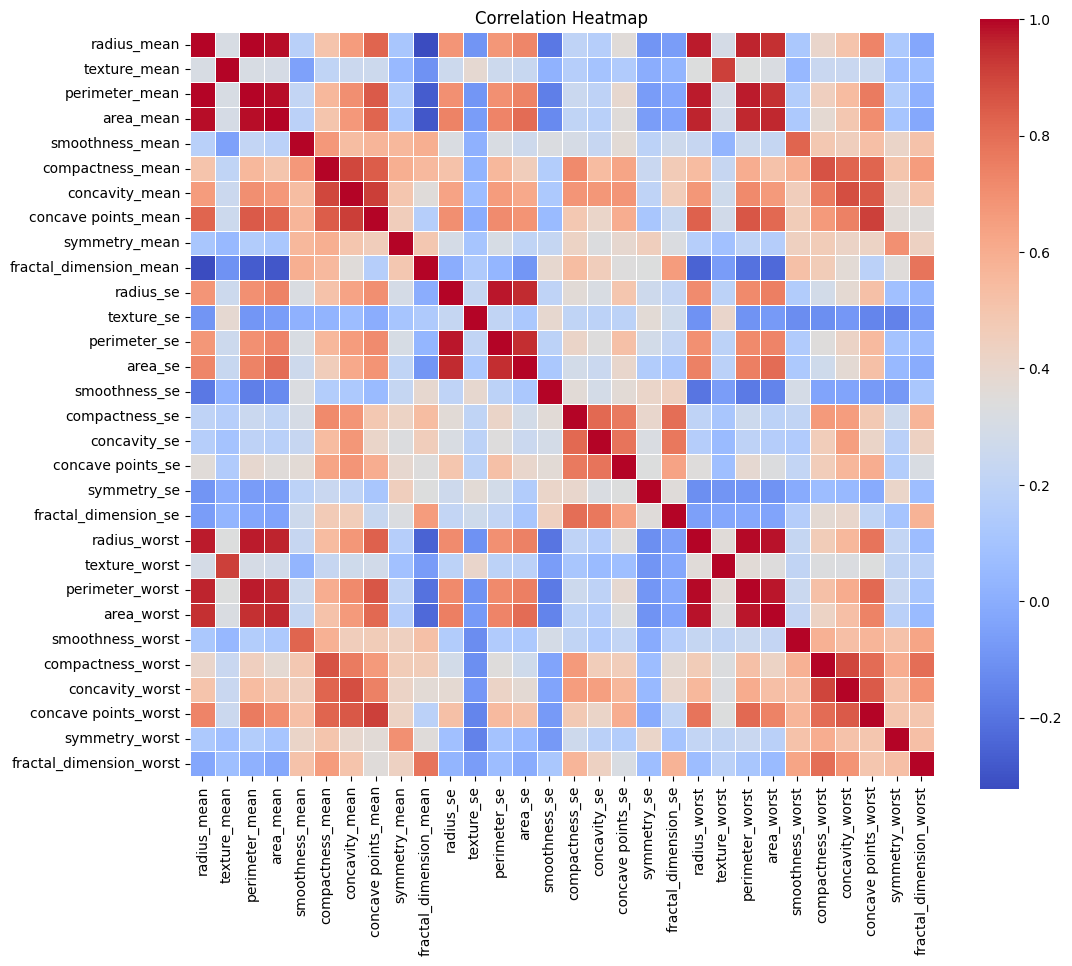

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Optimized Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Model saved and loaded successfully as optimized_breast_cancer_model.pkl.

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        90
   Malignant       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



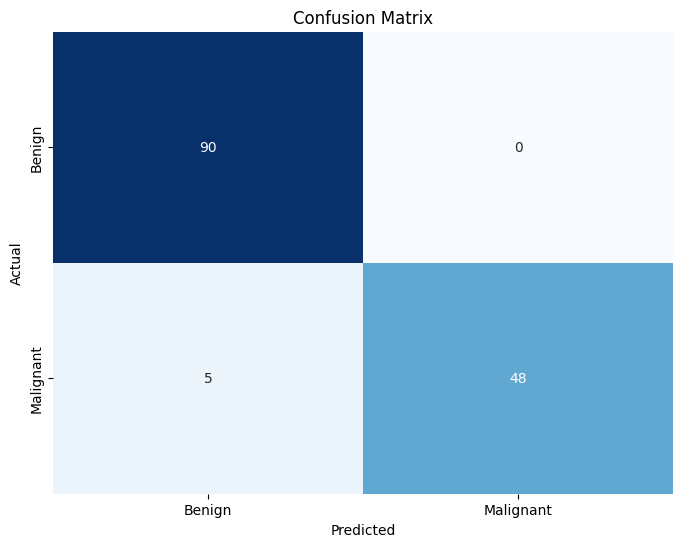

<ipython-input-3-441ca6f870e2>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importances.index, x=feature_importances.values, palette="mako", edgecolor="black")


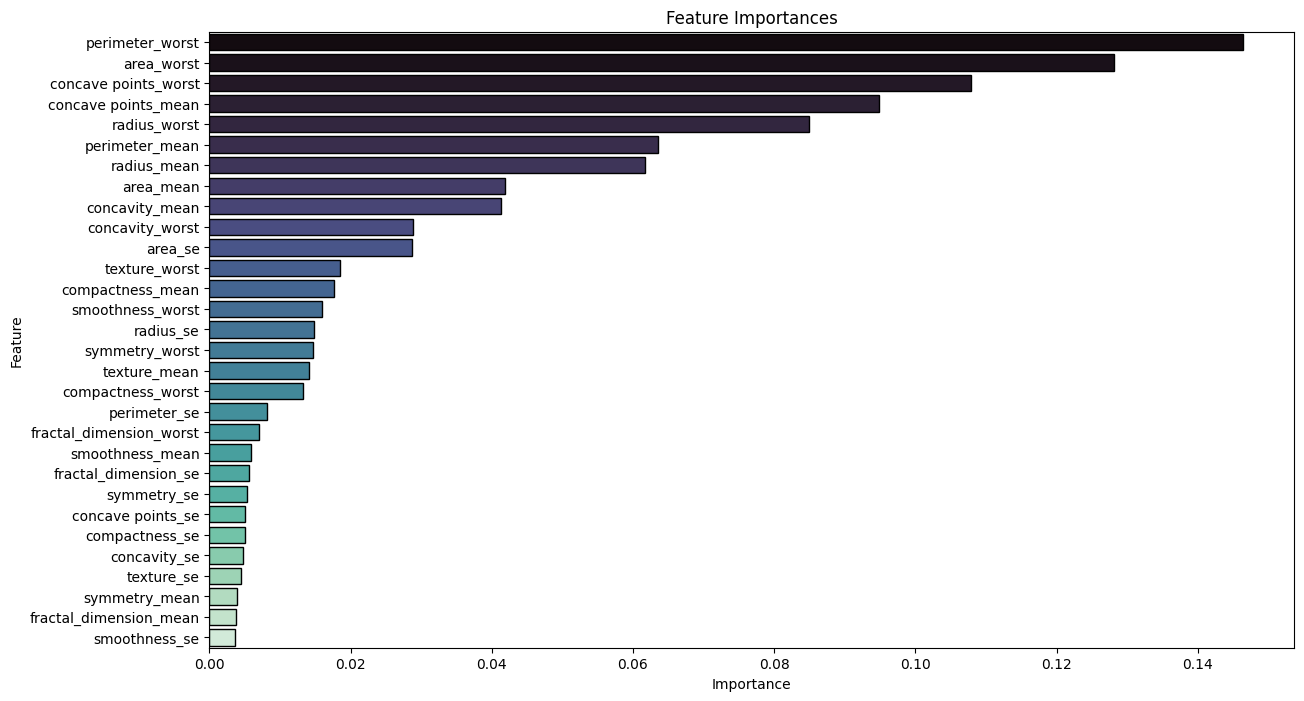


Final Model Accuracy: 96.50%


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the dataset
file_path = "/content/BreastCancer.csv"
data = pd.read_csv(file_path)

# Display basic dataset statistics
print("Dataset Overview:")
print(data.describe(include='all').transpose())

# Remove any irrelevant or unnecessary columns
drop_columns = [col for col in data.columns if 'Unnamed' in col or data[col].nunique() == 1]
data.drop(columns=drop_columns, inplace=True)

# Check for missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print("\nMissing Values Detected:")
    print(missing_values[missing_values > 0])
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy="mean")
    data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
else:
    print("\nNo missing values detected.")

# Target variable mapping and feature preprocessing
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})  # Binary mapping for target
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Visualizing target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=False, linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.show()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 3]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("\nOptimized Hyperparameters:")
print(grid_search.best_params_)

# Model training with the best estimator
best_model = grid_search.best_estimator_

# Save and load the model
model_filename = "optimized_breast_cancer_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)

print(f"\nModel saved and loaded successfully as {model_filename}.")

# Evaluation and metrics
y_pred = loaded_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importances visualization
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(y=feature_importances.index, x=feature_importances.values, palette="mako", edgecolor="black")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Accuracy: {accuracy:.2%}")
